In [10]:
# 1. Import library
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load dataset
df = pd.read_csv('/content/drug200.csv')
df



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [11]:
df.info()
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB

Jumlah missing value per kolom:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [12]:
# Contoh pengisian missing value
df['Age'].fillna(df['Age'].median(), inplace=True)


<ipython-input-12-8060a08a5527>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [13]:
print("Jumlah duplikat:", df.duplicated().sum())

# Hapus jika ada
df.drop_duplicates(inplace=True)


Jumlah duplikat: 0


In [14]:
df.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


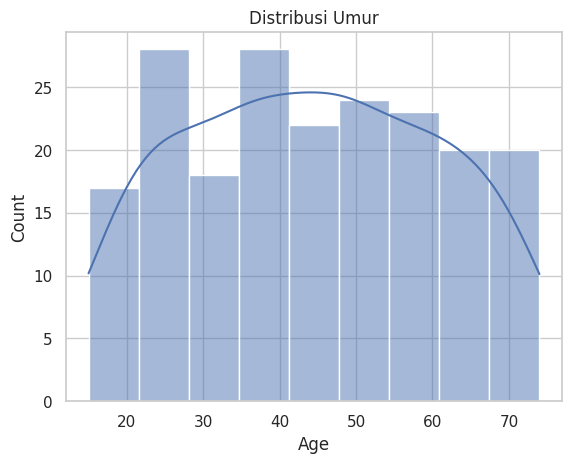

In [18]:
sns.histplot(df['Age'], kde=True)
plt.title("Distribusi Umur")
plt.show()

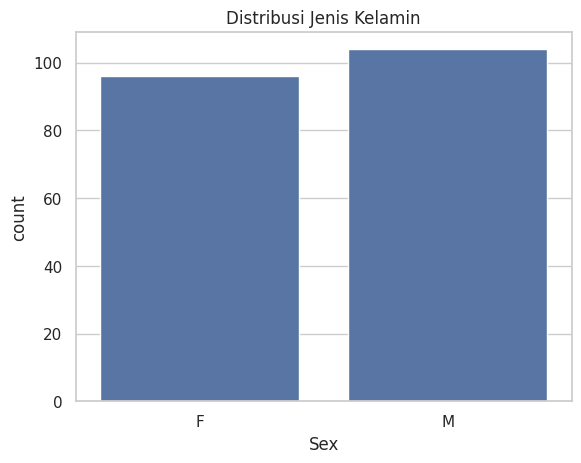

In [17]:
sns.countplot(x='Sex', data=df)
plt.title("Distribusi Jenis Kelamin")
plt.show()

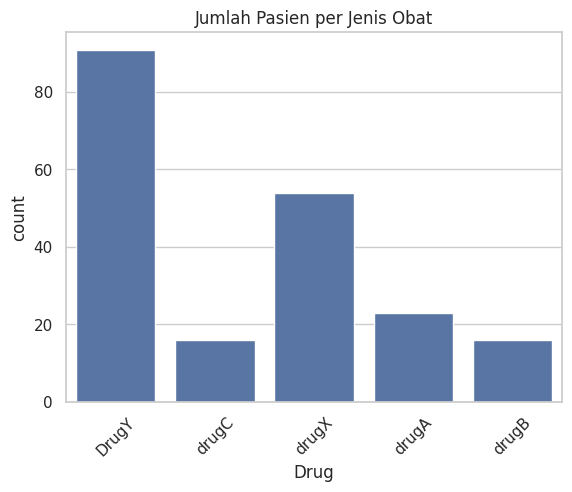

In [20]:
sns.countplot(x='Drug', data=df)
plt.title("Jumlah Pasien per Jenis Obat")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Encode Sex dan BP (Blood Pressure)
df['Sex_num'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP_num'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol_num'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})

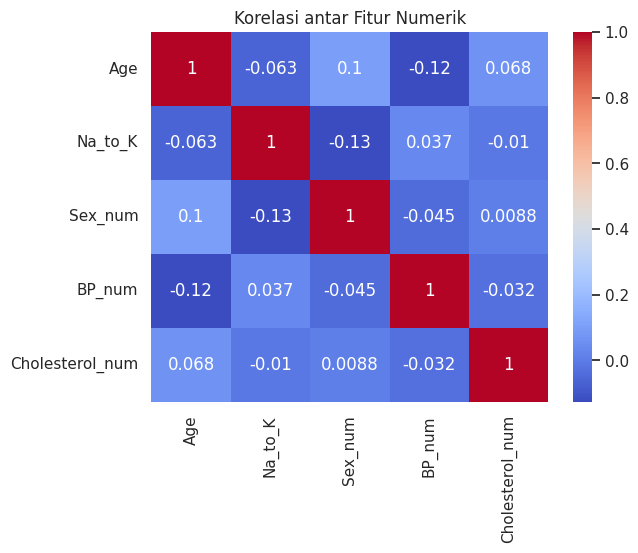

In [22]:
sns.heatmap(df[['Age', 'Na_to_K', 'Sex_num', 'BP_num', 'Cholesterol_num']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()